# Setup

## Options

In [1]:
import crispr as cr 
import pertpy
import muon
import os
import pandas as pd
import numpy as np
from config import (files_data, col_cell_type_data, col_gene_symbols_data, 
                    assays_data, layer_perturbation_data,
                    col_perturbation_data, key_control_data, 
                    col_split_by_data, layer_perturbation_data,
                    label_perturbation_type_data, col_target_genes_data,
                    key_treatment_data, col_guide_rna_data,
                    col_sample_id_data, load_example_data)

# Options
print(dir(cr.ax))
n_threads = 4
file = "CRISPRi_scr"
# file = "CRISPRi_ess"
# file = "ECCITE"
# file = "augur_ex"
# file = "screen"
# file = "coda"
# file = "perturb-seq"
# regress_out = ['total_counts', 'pct_counts_mt']
regress_out = None
process_kws = dict(hvg_kws = dict(min_mean=0.0125, max_mean=3, min_disp=0.5),
                   target_sum = 1e4, max_genes_by_counts = 2500, 
                   max_pct_mt = 5, min_genes = 200, min_cells = 3, scale = 10,
                   regress_out = regress_out)
write_public = True  # if need to download public data, write to examples/data?

#  Set Arguments
col_cell_type = col_cell_type_data[file]
col_sample_id = col_sample_id_data[file]
col_perturbation = col_perturbation_data[file]
key_control, label_perturbation_type, col_target_genes, layer = [
    x[file] for x in [key_control_data, label_perturbation_type_data,
                      col_target_genes_data, layer_perturbation_data]
]
col_gene_symbols = col_gene_symbols_data[file]
if file in assays_data:
    if isinstance(assays_data[file], str) or assays_data[file] is None:
        assays_data[file] = [assays_data[file], None]
    assay, assay_protein = assays_data[file]
else:
    assay, assay_protein = None
key_treatment = key_treatment_data[file]
col_split_by = col_split_by_data[file]
col_guide_rna = col_guide_rna_data[file]
layer_perturbation = layer_perturbation_data[file]
file_path = files_data[file]
print(files_data)

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'analyze_composition', 'cluster', 'clustering', 'perform_augur', 'perform_differential_prioritization', 'perform_mixscape', 'perturbations']
{'CRISPRi_scr': '/home/asline01/projects/crispr/examples/data/crispr-screening/filtered_feature_bc_matrix_HH06.h5', 'CRISPRi_wgs': '/home/asline01/projects/crispr/examples/data/replogle_2022_k562_gwps.h5ad', 'CRISPRi_ess': '/home/asline01/projects/crispr/examples/data/replogle_2022_k562_esss.h5ad', 'pool': '/home/asline01/projects/crispr/examples/data/norman_2019_raw.h5ad', 'bulk': '/home/asline01/projects/crispr/examples/data/burczynski_crohn.h5ad', 'screen': '/home/asline01/projects/crispr/examples/data/dixit_2016_raw.h5ad', 'perturb-seq': '/home/asline01/projects/crispr/examples/data/adamson_2016_upr_perturb_seq.h5ad', 'ECCITE': '/home/asline01/projects/crispr/examples/data/papalexi_2021.h5ad', 'coda': '/home/asline01/projects/

## Data

### Load

In [16]:
h5f["matrix"]["features"].keys()

<KeysViewHDF5 ['_all_tag_keys', 'feature_type', 'genome', 'id', 'name', 'pattern', 'read', 'sequence', 'target_gene_id', 'target_gene_name']>

In [22]:

h5f["matrix"]["features"]["target_gene_id"]
dir(h5f["matrix"]["features"]["target_gene_name"])

        matrix = sp_sparse.csr_matrix((f['matrix']['data'], 
                                       f['matrix']['indices'], 
                                       f['matrix']['indptr']), 
                                      shape=f['matrix']['shape'])
        fbm = FeatureBCMatrix(feature_ids, feature_names, barcodes, matrix)

['__array__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache_props',
 '_d',
 '_dcpl',
 '_dxpl',
 '_e',
 '_extent_type',
 '_fast_read_ok',
 '_fast_reader',
 '_filters',
 '_id',
 '_is_empty',
 '_lapl',
 '_lcpl',
 '_readonly',
 '_selector',
 'asstr',
 'astype',
 'attrs',
 'chunks',
 'compression',
 'compression_opts',
 'dims',
 'dtype',
 'external',
 'fields',
 'file',
 'fillvalue',
 'fletcher32',
 'flush',
 'id',
 'is_scale',
 'is_virtual',
 'iter_chunks',
 'len',
 'make_scale',
 'maxshape',
 'name',
 'nbytes',
 'ndim',
 'parent',
 'read_dire

In [6]:
import scanpy as sc

# with h5py.File(file_path, 'r') as h5_file:
#     print(list(h5_file.keys()))  # List all the keys (datasets/groups) in the file
#     print(h5_file["matrix"].keys())
#     # Explore the structure of the file and metadata
h5f = h5py.File(file_path, "r")

adata = load_example_data(file, col_gene_symbols=col_gene_symbols)
print(pd.read_csv("data/crispr-screening/feature_ref.csv"))
adata.obs

File Path: /home/asline01/projects/crispr/examples/data/crispr-screening/filtered_feature_bc_matrix_HH06.h5


/home/asline01/projects/crispr/examples/data/crispr-screening/filtered_feature_bc_matrix_HH06.h5 exists.

<<< LOADING 10X .h5 FILE /home/asline01/projects/crispr/examples/data/crispr-screening/filtered_feature_bc_matrix_HH06.h5>>>
H5 File Format (/home/asline01/projects/crispr/examples/data/crispr-screening/filtered_feature_bc_matrix_HH06.h5)


Group: matrix
  Dataset: barcodes
  Dataset: data
  Dataset: features
  Dataset: indices
  Dataset: indptr
  Dataset: shape
               id          name read                   pattern  \
0         PHTF1-1       PHTF1-1   R2  (BC)GTTTCAGAGCTAAGCACAAG   
1         RSBN1-1       RSBN1-1   R2  (BC)GTTTCAGAGCTAAGCACAAG   
2        PTPN22-1      PTPN22-1   R2  (BC)GTTTCAGAGCTAAGCACAAG   
3         HIPK1-1       HIPK1-1   R2  (BC)GTTTCAGAGCTAAGCACAAG   
4         FASLG-1       FASLG-1   R2  (BC)GTTTCAGAGCTAAGCACAAG   
..            ...      

""
AAACCCAAGAAGAACG-1
AAACCCAAGCTCCCTT-1
AAACCCAAGGCTCCCA-1
AAACCCAAGGGCCTCT-1
AAACCCACAGATCACT-1
...
TTTGTTGTCCGACAGC-1
TTTGTTGTCGGAAGGT-1
TTTGTTGTCTACCACC-1
TTTGTTGTCTAGCAAC-1


In [5]:
adata.obs

""
AAACCCAAGAAGAACG-1
AAACCCAAGCTCCCTT-1
AAACCCAAGGCTCCCA-1
AAACCCAAGGGCCTCT-1
AAACCCACAGATCACT-1
...
TTTGTTGTCCGACAGC-1
TTTGTTGTCGGAAGGT-1
TTTGTTGTCTACCACC-1
TTTGTTGTCTAGCAAC-1


In [275]:
common_genes

Index([], dtype='object')

In [274]:
import scipy.sparse as sp
import scanpy as sc

adata = sc.read_10x_h5(file_path, gex_only=False)
adata_crispr = adata[:, adata.var.feature_types == "CRISPR Guide Capture"]
adata = adata[:, adata.var.feature_types == "Gene Expression"]
common_genes = adata.var_names.intersection(adata_crispr.var_names)
adata = adata[:, common_genes]
adata.layers["X_pert"] = sp.csr_matrix(adata_crispr.X)

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [178]:
fbm, gex, barcodes, genes = get_matrix_from_h5(file_path)

AttributeError: 'Dataset' object has no attribute 'T'

In [109]:
adata.var[adata.var.feature_types == "CRISPR Guide Capture"]
adata.var[adata.var.feature_types == "Gene Expression"]

,gene_ids,feature_types,genome
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38
FAM138A,ENSG00000237613,Gene Expression,GRCh38
OR4F5,ENSG00000186092,Gene Expression,GRCh38
AL627309.1,ENSG00000238009,Gene Expression,GRCh38
AL627309.3,ENSG00000239945,Gene Expression,GRCh38
...,...,...,...
AC141272.1,ENSG00000277836,Gene Expression,GRCh38
AC023491.2,ENSG00000278633,Gene Expression,GRCh38
AC007325.1,ENSG00000276017,Gene Expression,GRCh38
AC007325.4,ENSG00000278817,Gene Expression,GRCh38


In [257]:
adata = load_example_data(file, col_gene_symbols, 
                          write_public=write_public)  # (down)load h5ad file
print(adata)
adata.obs.head()
print(adata.layers)
# if col_perturbation is not None:
#     print(f"\n\n{'=' * 80}\n\nPerturbations:\n")
#     print(adata[assay].obs[
#         col_perturbation].unique() if assay else adata.obs[
#             col_perturbation].unique())
adata[assay].obs.head() if assay else adata.obs.head()

File Path: /home/asline01/projects/crispr/examples/data/crispr-screening/filtered_feature_bc_matrix_HH04.h5


/home/asline01/projects/crispr/examples/data/crispr-screening/filtered_feature_bc_matrix_HH04.h5 exists.

<<< LOADING 10X .h5 FILE /home/asline01/projects/crispr/examples/data/crispr-screening/filtered_feature_bc_matrix_HH04.h5>>>
AnnData object with n_obs × n_vars = 22087 × 36717
    var: 'gene_ids', 'feature_types', 'genome'
Layers with keys: 


""
AAACCCAAGCATGAAT-1
AAACCCAAGCGCAATG-1
AAACCCAAGCGTGTCC-1
AAACCCAAGCTCGGCT-1
AAACCCAAGGAGAATG-1


### Process

In [3]:
print(process_kws)
adata = cr.pp.process_data(adata, assay=assay, assay_protein=assay_protein,
                           **process_kws)  # process

{'hvg_kws': {'min_mean': 0.0125, 'max_mean': 3, 'min_disp': 0.5}, 'target_sum': 10000.0, 'max_genes_by_counts': 2500, 'max_pct_mt': 5, 'min_genes': 200, 'min_cells': 3, 'scale': 10, 'regress_out': None}

<<< NORMALIZING >>>

<<< FILTERING >>>

<<< DETECTING VARIABLE GENES >>>

<<< SCALING >>>





### Assign Guide RNAs

In [4]:
if "mod" in dir(adata) and "gdo" in adata.mod:  # Guide RNA assignment
    print(adata["gdo"])
    figs_guide_rna = cr.pp.assign_guide_rna(adata, plot=True, 
                                            show_gene_labels=True)
    print(adata["gdo"])  # creates layer "assigned_guides"

## Inspect

In [5]:
print(adata)
print(adata.obs)
adata[assay].obs if assay else adata.obs

AnnData object with n_obs × n_vars = 11022 × 408
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'log1p', 'hvg'
                    n_genes  n_genes_by_counts  total_counts  total_counts_mt  \
AAACCCAAGCGCAATG-1      316                316    461.970764         7.599228   
AAACCCAAGGATTTCC-1      510                510    411.824432         8.161230   
AAACCCACAACCAATC-1      351                351    261.544495         8.521359   
AAACCCACACGAAAGC-1      350                350    382.616364         6.166709   
AAACCCACATGAAGCG-1      423                423    236.493439         5.736679   
...                     ...                ...           ...              ...   
TTTGTTGGTTCGGGTC-1      394                394   

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACCCAAGCGCAATG-1,316,316,461.970764,7.599228,1.644958
AAACCCAAGGATTTCC-1,510,510,411.824432,8.161230,1.981726
AAACCCACAACCAATC-1,351,351,261.544495,8.521359,3.258092
AAACCCACACGAAAGC-1,350,350,382.616364,6.166709,1.611721
AAACCCACATGAAGCG-1,423,423,236.493439,5.736679,2.425725
...,...,...,...,...,...
TTTGTTGGTTCGGGTC-1,394,394,373.043671,9.538553,2.556954
TTTGTTGTCACTCGAA-1,220,220,265.537659,10.475570,3.945041
TTTGTTGTCCCATAAG-1,333,333,333.157684,7.464774,2.240613
TTTGTTGTCCCTGGTT-1,303,303,537.586853,9.363891,1.741838


# Analysis

## UMAP

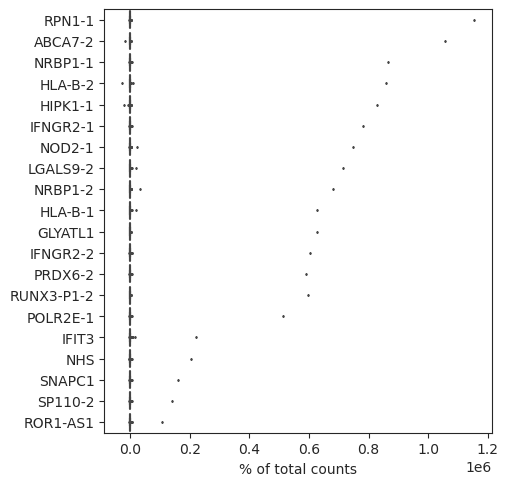



<<< PERFORMING PCA >>>


<<< COMPUTING NEIGHBORHOOD GRAPH >>>


<<< EMBEDDING WITH UMAP >>>


<<< CLUSTERING WITH LEIDEN METHOD >>>


<<< CREATING UMAP PLOTS >>>


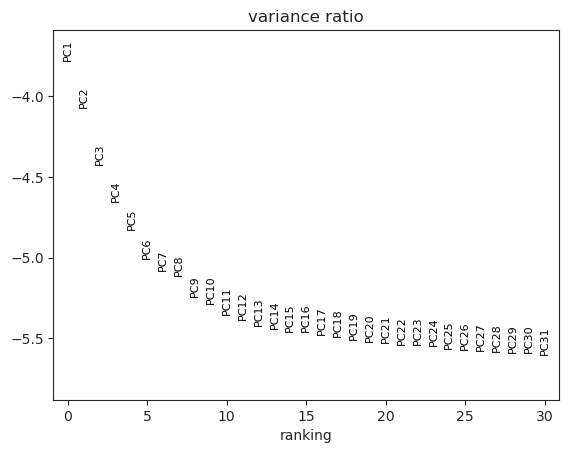

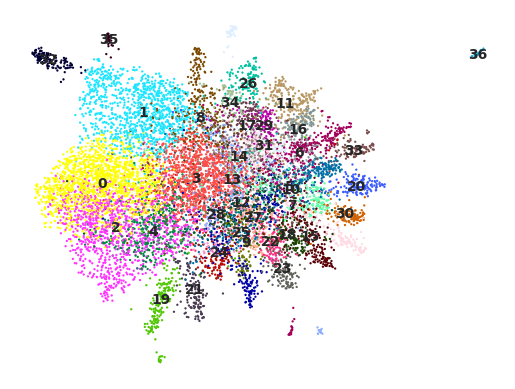

In [9]:
figs_cluster = cr.ax.clustering.cluster(adata, assay=assay, plot=True,
                                        method_cluster="leiden")

## Mixscape

In [8]:
if assay:
    print("Perturbations:\n" + ", ".join(
        adata[assay].obs[col_perturbation].astype(str).unique()))
else:
    print("Perturbations:\n" + ", ".join(
        adata.obs[col_perturbation].astype(str).unique()))
figs_mix = cr.ax.perform_mixscape(
    adata, col_perturbation, assay=assay, key_control=key_control,
    label_perturbation_type=label_perturbation_type, 
    layer_perturbation=layer_perturbation,
    target_gene_idents=True,  # to plot all
    col_target_genes=col_target_genes, 
    min_de_genes=5, col_split_by=col_split_by, plot=True)

KeyError: nan

## Augur

In [9]:
data, results, figs_aug = cr.ax.perform_augur(adata, assay=assay,
                                              classifier="random_forest_classifier", 
                                              augur_mode="velocity", subsample_size=20,
                                              select_variance_features=False, 
                                              col_cell_type=col_cell_type,
                                              col_perturbation=col_perturbation,
                                              key_control=key_control,
                                              key_treatment=key_treatment,
                                              seed=1618, n_threads=n_threads, plot=True)

Filtering samples with NT and Perturbed labels.

Output()

KeyboardInterrupt: 

## SCCoda

### Compositional Analysis

In [ ]:
reference_cell_type = 1
sccoda_out = cr.ax.analyze_composition(
    adata, reference_cell_type, analysis_type="cell_level",
    generate_sample_level=True, col_cell_type=col_cell_type,
    col_sample_id=col_sample_id, modality_key=None,
    col=col_perturbation, est_fdr=0.05, plot=True,
    out_file=None)